In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [9]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [10]:
df.shape

(42000, 785)

In [11]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
import matplotlib.pyplot as plt

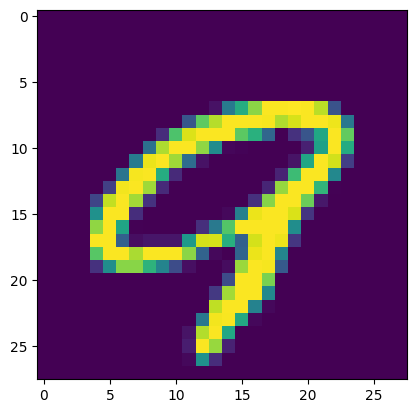

In [13]:
plt.imshow(df.iloc[1836,1:].values.reshape(28,28))

In [14]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape

(33600, 784)

In [17]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

In [ ]:
y_pred = knn.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

# PCA

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [22]:
from sklearn.decomposition import PCA

In [5]:
pca = PCA(n_components=300)

NameError: name 'PCA' is not defined

In [ ]:
X_train_trf = pca.fit_transform(X_train_trf)
X_test_trf = pca.fit_transform(X_test_trf)

In [ ]:
X_train.shape

In [ ]:
X_train_trf.shape

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train_trf,y_train)

In [ ]:
y_pred = knn.predict(X_test_trf)

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
for i in range (1,785,10):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.fit_transform(X_test)
    
    knn = KNeighborsClassifier()
    
    knn.fit(X_train_trf,y_train)
    y_pred = knn.predict(X_test_trf)
    
    print(f'{i} Accuracy: ',accuracy_score(y_test,y_pred))
    

In [23]:
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

In [24]:
X_train_trf

array([[-2.71859482, -0.4891126 ],
       [-0.67711568, -6.75483371],
       [-3.03356391,  6.50831972],
       ...,
       [ 2.1485355 ,  0.77897692],
       [ 1.05964936,  0.94884916],
       [17.70253692,  1.96215916]])

In [25]:
import plotly.express as px
y_train_trf =  y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                y=X_train_trf[:,1],
                 color= y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [26]:
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

In [27]:
y_train_trf =  y_train.astype(str)
fig = px.scatter_3d(x=X_train_trf[:,0],
                y=X_train_trf[:,1],
                z=X_train_trf[:,2],
                 color= y_train_trf
                )
fig.show()

In [28]:
pca.explained_variance_

array([40.87278367, 28.96627936, 27.04279929])

In [30]:
pca.components_.shape

(3, 784)

In [31]:
pca.explained_variance_ratio_

array([0.06054506, 0.0429079 , 0.04005864])

In [32]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

In [33]:
pca.explained_variance_.shape

(784,)

In [34]:
pca.components_.shape

(784, 784)

In [36]:
np.cumsum(pca.explained_variance_ratio_)

array([0.06054506, 0.10345296, 0.1435116 , 0.17415505, 0.2008633 ,
       0.22392381, 0.24424437, 0.26328712, 0.28003017, 0.2950511 ,
       0.30952231, 0.32260084, 0.33454207, 0.34622198, 0.35749028,
       0.36820838, 0.37831441, 0.38840962, 0.39802008, 0.40749915,
       0.41658467, 0.42512074, 0.43338064, 0.44145368, 0.44932118,
       0.45695772, 0.46439035, 0.47152133, 0.47853667, 0.48528122,
       0.49197554, 0.4984955 , 0.50488983, 0.5109932 , 0.5170139 ,
       0.5229398 , 0.52882391, 0.53456336, 0.54018641, 0.54558837,
       0.55086928, 0.55610074, 0.56122164, 0.56626877, 0.57113961,
       0.57591378, 0.58060368, 0.58528499, 0.58988803, 0.59443601,
       0.59890358, 0.60333665, 0.6077026 , 0.61197655, 0.61617648,
       0.6203279 , 0.6243674 , 0.62836904, 0.632244  , 0.63608538,
       0.63988348, 0.64363517, 0.64732886, 0.65099829, 0.65461534,
       0.65818137, 0.66169008, 0.66515602, 0.66856668, 0.67192998,
       0.67525401, 0.67855196, 0.68178585, 0.68499317, 0.68817

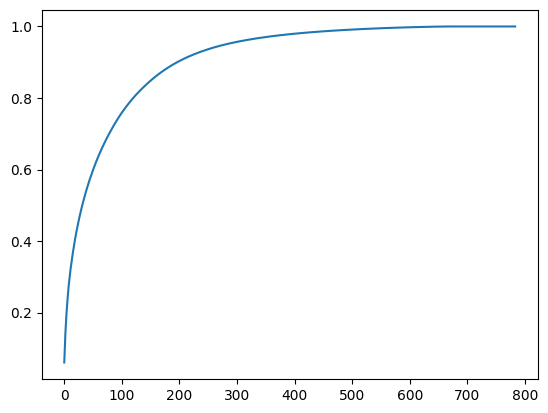

In [37]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))